In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
import joblib
from scipy.stats import entropy
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import StratifiedKFold
import shap
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
xtrain = pd.read_csv('X_Train_Data_Input.csv') #Loading the datasets

In [3]:
ytrain = pd.read_csv('Y_Train_Data_Target.csv')

In [4]:
xtest = pd.read_csv('X_Test_Data_Input.csv')

In [5]:
ytest = pd.read_csv('Y_Test_Data_Target.csv')

In [6]:
xtrain = xtrain.drop('ID', axis=1) #To avoid conflict with the alphanumeric scene 

In [7]:
ytrain = ytrain.drop('ID',axis=1)

In [8]:
xtest = xtest.drop('ID', axis=1)

In [9]:
ytest = ytest.drop('ID', axis=1)

In [10]:
xtrain.isnull().sum()#checking null values

Column0          9
Column1          0
Column2          0
Column3     126303
Column4     127710
Column5     167180
Column6       3850
Column7          0
Column8       3850
Column9     732137
Column10         0
Column11         0
Column12         0
Column13         0
Column14    365703
Column15     16456
Column16         0
Column17         0
Column18         0
Column19         0
Column20         0
Column21         0
dtype: int64

In [11]:
xtrain = xtrain.drop('Column9', axis=1) #Dropping column 9 because of 93% missing values and less correlation to y

In [12]:
xtest = xtest.drop('Column9',axis=1)

In [13]:
xtrain.isnull().sum()

Column0          9
Column1          0
Column2          0
Column3     126303
Column4     127710
Column5     167180
Column6       3850
Column7          0
Column8       3850
Column10         0
Column11         0
Column12         0
Column13         0
Column14    365703
Column15     16456
Column16         0
Column17         0
Column18         0
Column19         0
Column20         0
Column21         0
dtype: int64

In [14]:
xtest.isnull().sum()

Column0          2
Column1          0
Column2          0
Column3      42234
Column4      42710
Column5      55659
Column6       1234
Column7          0
Column8       1234
Column10         0
Column11         0
Column12         0
Column13         0
Column14    121679
Column15      5485
Column16         0
Column17         0
Column18         0
Column19         0
Column20         0
Column21         0
dtype: int64

In [15]:
xtrain

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column10,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
0,2.0,2495,3726.0,0.678139,0.701403,-0.007468,0.434190,-0.015603,0.606265,0,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0
1,0.0,2495,3454.0,0.452580,0.701403,-0.007468,1.554998,-0.015574,0.329946,0,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0
2,2.0,2495,4543.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,1,...,1,1,0.001351,0.00339,0.0,0,0.0,0,0,0
3,0.0,211,59.0,NaN,NaN,NaN,-0.407939,-0.015607,-0.774979,0,...,0,0,NaN,0.00339,0.0,0,1.0,0,0,0
4,0.0,718,950.0,-2.028572,-1.855728,NaN,-0.407939,-0.015607,-0.774979,0,...,0,0,NaN,0.00339,0.0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785128,0.0,304,1126.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,0,...,0,0,NaN,0.00339,0.0,0,1.0,0,0,0
785129,0.0,2495,2265.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.509591,1,...,1,1,0.001351,0.00339,0.0,0,0.0,0,0,0
785130,0.0,2495,3760.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.218972,0,...,1,1,0.001351,0.00339,0.0,0,0.0,0,0,0
785131,0.0,2480,4493.0,0.001462,0.062121,-0.007468,-0.407939,-0.015607,0.400071,1,...,1,1,0.001351,0.00339,0.0,0,0.0,0,0,0


In [16]:
#Function to get minimum-maximum values of each column
def calculate_min_max(df):
    min_max_values = {}
    for col in df.columns:
        min_val = df[col].min()
        max_val = df[col].max()
        min_max_values[col] = f"{min_val} - {max_val}"
    return min_max_values
    

In [17]:
min_max_xtrain = calculate_min_max(xtrain)
min_max_xtest = calculate_min_max(xtest)

In [18]:
print("Min and Max values for xtrain:\n", min_max_xtrain)
print("Min and Max values for xtest:\n", min_max_xtest)

Min and Max values for xtrain:
 {'Column0': '0.0 - 18.0', 'Column1': '-1080 - 2499', 'Column2': '-47.0 - 10290.0', 'Column3': '-2.028572085775468 - 0.6781394378315789', 'Column4': '-1.855728261270304 - 0.7014034666794821', 'Column5': '-0.0074686502841777 - 551.4211272823667', 'Column6': '-0.407939121815475 - 14.985816764089668', 'Column7': '-0.0156074272276953 - 201.6879465072102', 'Column8': '-0.7749791570104966 - 323.9924837296536', 'Column10': '0 - 1', 'Column11': '0 - 1', 'Column12': '0 - 1', 'Column13': '0 - 1', 'Column14': '-832.7496150480905 - 8.514415650895968', 'Column15': '-1091.5459037897017 - 0.0127356535790858', 'Column16': '0.0 - 2.0', 'Column17': '0 - 728', 'Column18': '0.0 - 12.0', 'Column19': '0 - 1', 'Column20': '0 - 1', 'Column21': '0 - 1'}
Min and Max values for xtest:
 {'Column0': '0.0 - 18.0', 'Column1': '-933 - 2501', 'Column2': '-57.0 - 9977.0', 'Column3': '-2.028572085775468 - 0.6781394378315789', 'Column4': '-1.855728261270304 - 0.7014034666794821', 'Column5':

In [19]:
summary_stats = xtrain.describe(include='all') #Getting column stats all in one summary


In [20]:
summary_stats

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column10,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
count,785124.000000,785133.000000,785133.000000,658830.000000,657423.000000,617953.000000,781283.000000,785133.000000,781283.000000,785133.000000,...,785133.000000,785133.000000,419430.000000,768677.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000
mean,0.440757,1321.788614,2951.279411,-0.000210,-0.000855,-0.000367,-0.000709,0.000727,-0.000158,0.240575,...,0.363122,0.328285,-0.000863,-0.000837,0.001206,0.270092,0.147856,0.018759,0.009351,0.002757
std,1.163275,907.267965,2143.140140,0.999935,1.000350,1.015255,0.998984,1.045883,1.056769,0.427433,...,0.480900,0.469589,1.291202,1.283393,0.034855,3.128214,0.430530,0.135671,0.096249,0.052439
min,0.000000,-1080.000000,-47.000000,-2.028572,-1.855728,-0.007469,-0.407939,-0.015607,-0.774979,0.000000,...,0.000000,0.000000,-832.749615,-1091.545904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,515.000000,1129.000000,-0.675216,-0.577162,-0.007469,-0.407939,-0.015607,-0.774979,0.000000,...,0.000000,0.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1173.000000,2709.000000,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.122085,0.000000,...,0.000000,0.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2435.000000,4472.000000,0.678139,0.701403,-0.007468,-0.367723,-0.015607,0.625528,0.000000,...,1.000000,1.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18.000000,2499.000000,10290.000000,0.678139,0.701403,551.421127,14.985817,201.687947,323.992484,1.000000,...,1.000000,1.000000,8.514416,0.012736,2.000000,728.000000,12.000000,1.000000,1.000000,1.000000


In [21]:
# Entropy measures the unpredictability or randomness in the data
def calculate_entropy(series):
    value_counts = series.value_counts()
    return entropy(value_counts)

entropies = xtrain.apply(calculate_entropy)
print("Entropies of columns:", entropies)
#Calculating this to really get into the gist of which column is categorical

Entropies of columns: Column0     0.758570
Column1     6.420899
Column2     8.747116
Column3     1.790242
Column4     1.665078
Column5     4.760224
Column6     3.820563
Column7     4.497866
Column8     7.733840
Column10    0.551741
Column11    0.619455
Column12    0.655193
Column13    0.632957
Column14    6.045748
Column15    1.715010
Column16    0.009310
Column17    0.188733
Column18    0.436441
Column19    0.093168
Column20    0.052999
Column21    0.019005
dtype: float64


In [22]:
# Identifying potential categorical columns based on entropy
entropy_threshold = 2  # Adjusting this threshold 
potential_categorical_cols = entropies[entropies < entropy_threshold].index.tolist()

print("Potential categorical columns based on entropy:", potential_categorical_cols)


Potential categorical columns based on entropy: ['Column0', 'Column3', 'Column4', 'Column10', 'Column11', 'Column12', 'Column13', 'Column15', 'Column16', 'Column17', 'Column18', 'Column19', 'Column20', 'Column21']


In [23]:
def unique_values_count(df):
    unique_values = {col: df[col].nunique() for col in df.columns}
    return unique_values


In [24]:


unique_values_xtrain = unique_values_count(xtrain)

print("Number of unique values in each column of xtrain:\n", unique_values_xtrain)


Number of unique values in each column of xtrain:
 {'Column0': 19, 'Column1': 2564, 'Column2': 9424, 'Column3': 47, 'Column4': 47, 'Column5': 148334, 'Column6': 157264, 'Column7': 166513, 'Column8': 355728, 'Column10': 2, 'Column11': 2, 'Column12': 2, 'Column13': 2, 'Column14': 42362, 'Column15': 66302, 'Column16': 3, 'Column17': 153, 'Column18': 11, 'Column19': 2, 'Column20': 2, 'Column21': 2}


In [25]:
#function to check unique values of the potential categorical columns for training data
def unique_values_count(df, columns):
    unique_values = {col: df[col].nunique() for col in columns}
    return unique_values


unique_values_counts = unique_values_count(xtrain, potential_categorical_cols)

print("Number of unique values in potential categorical columns:\n", unique_values_counts)


Number of unique values in potential categorical columns:
 {'Column0': 19, 'Column3': 47, 'Column4': 47, 'Column10': 2, 'Column11': 2, 'Column12': 2, 'Column13': 2, 'Column15': 66302, 'Column16': 3, 'Column17': 153, 'Column18': 11, 'Column19': 2, 'Column20': 2, 'Column21': 2}


In [26]:
#For testing data
unique_values_counts = unique_values_count(xtest, potential_categorical_cols)

print("Number of unique values in potential categorical columns:\n", unique_values_counts)

Number of unique values in potential categorical columns:
 {'Column0': 19, 'Column3': 47, 'Column4': 47, 'Column10': 2, 'Column11': 2, 'Column12': 2, 'Column13': 2, 'Column15': 24084, 'Column16': 2, 'Column17': 124, 'Column18': 11, 'Column19': 2, 'Column20': 2, 'Column21': 2}


In [27]:
# Assigning numerical columns
numerical_cols = ['Column1', 'Column2', 'Column5', 'Column6', 'Column7', 'Column8', 'Column14', 'Column15']

# Assigning categorical columns
categorical_cols = ['Column0', 'Column3', 'Column4', 'Column10', 'Column11', 'Column12', 'Column13', 'Column16', 'Column17', 'Column18', 'Column19', 'Column20', 'Column21']


In [28]:

# Defining the imputers and scaler
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')
scaler = StandardScaler()

In [29]:

# Combining preprocessing steps into a single pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('impute', num_imputer),
            ('scale', scaler)
        ]), numerical_cols),
        ('cat', Pipeline(steps=[
            ('impute', cat_imputer)
        ]), categorical_cols)
    ])

In [30]:
# Applying preprocessing to training data
X_train_preprocessed = preprocessor.fit_transform(xtrain)
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=numerical_cols + categorical_cols)


In [31]:
# Saving the preprocessing pipeline
joblib.dump(preprocessor, 'preprocessing_pipeline.pkl')


['preprocessing_pipeline.pkl']

In [32]:
print("Preprocessed X_train:\n", X_train_preprocessed_df.head())

Preprocessed X_train:
     Column1   Column2   Column5   Column6   Column7   Column8  Column14  \
0  1.293126  0.361489 -0.006204  0.438239 -0.015613  0.574671  0.001253   
1  1.293126  0.234572 -0.006204  1.562491 -0.015586  0.312562  0.001253   
2  1.293126  0.742705 -0.006205 -0.406478 -0.015618 -0.735547  0.001253   
3 -1.224323 -1.349553 -0.006205 -0.406478 -0.015618 -0.735547  0.001253   
4 -0.665502 -0.933808 -0.006205 -0.406478 -0.015618 -0.735547  0.001253   

   Column15  Column0   Column3  ...  Column10  Column11  Column12  Column13  \
0  0.003259      2.0  0.678139  ...       0.0       0.0       0.0       0.0   
1  0.003259      0.0  0.452580  ...       0.0       0.0       0.0       0.0   
2  0.003259      2.0 -1.577453  ...       1.0       1.0       1.0       1.0   
3  0.003259      0.0  0.678139  ...       0.0       0.0       0.0       0.0   
4  0.003259      0.0 -2.028572  ...       0.0       0.0       0.0       0.0   

   Column16  Column17  Column18  Column19  Column20

In [33]:
# Apply preprocessing to testing data
X_test_preprocessed = preprocessor.transform(xtest)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=numerical_cols + categorical_cols)

print("Preprocessed X_test:\n", X_test_preprocessed_df.head())

Preprocessed X_test:
     Column1   Column2   Column5   Column6   Column7   Column8  Column14  \
0  0.732101 -1.352353 -0.006205 -0.406478 -0.015618  0.525910  0.001253   
1  0.283501 -1.371483 -0.006204 -0.406478 -0.015618  0.134421  0.001253   
2 -0.467104  0.403950 -0.006205 -0.406478 -0.015618 -0.735547  0.001253   
3 -1.369815  0.232239 -0.006205  0.006747 -0.015618  0.602180  0.001253   
4 -0.744862  1.660518 -0.006205 -0.406478 -0.015452 -0.735547  0.001253   

   Column15  Column0   Column3  ...  Column10  Column11  Column12  Column13  \
0  0.003259      1.0  0.678139  ...       1.0       1.0       1.0       1.0   
1  0.003259      2.0  0.678139  ...       0.0       1.0       1.0       0.0   
2  0.003259      0.0 -2.028572  ...       0.0       0.0       0.0       0.0   
3  0.003259      0.0 -0.675216  ...       0.0       1.0       0.0       1.0   
4  0.003259      1.0 -2.028572  ...       1.0       1.0       1.0       1.0   

   Column16  Column17  Column18  Column19  Column20 

In [34]:
# Outlier Removal
z_scores = stats.zscore(X_train_preprocessed_df[numerical_cols])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
X_train_clean = X_train_preprocessed_df[filtered_entries]
y_train_clean = ytrain[filtered_entries]

In [35]:
# Calculate and display percentage of outliers removed
outlier_count = len(X_train_preprocessed_df) - len(X_train_clean)
total_count = len(X_train_preprocessed_df)
outlier_percentage = (outlier_count / total_count) * 100
print(f"Percentage of data removed as outliers: {outlier_percentage:.2f}%")

Percentage of data removed as outliers: 5.60%


In [36]:
X_train_clean

,Column1,Column2,Column5,Column6,Column7,Column8,Column14,Column15,Column0,Column3,...,Column10,Column11,Column12,Column13,Column16,Column17,Column18,Column19,Column20,Column21
0,1.293126,0.361489,-0.006204,0.438239,-0.015613,0.574671,0.001253,0.003259,2.0,0.678139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.293126,0.234572,-0.006204,1.562491,-0.015586,0.312562,0.001253,0.003259,0.0,0.452580,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.293126,0.742705,-0.006205,-0.406478,-0.015618,-0.735547,0.001253,0.003259,2.0,-1.577453,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.224323,-1.349553,-0.006205,-0.406478,-0.015618,-0.735547,0.001253,0.003259,0.0,0.678139,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.665502,-0.933808,-0.006205,-0.406478,-0.015618,-0.735547,0.001253,0.003259,0.0,-2.028572,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785127,-1.355486,-0.233900,-0.006205,-0.406478,-0.015618,-0.735547,0.001253,0.003259,0.0,-1.126335,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
785128,-1.121818,-0.851685,-0.006205,-0.406478,-0.015618,-0.735547,0.001253,0.003259,0.0,0.678139,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
785129,1.293126,-0.320222,-0.006204,-0.406478,-0.015618,0.482969,0.001253,0.003259,0.0,0.678139,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
785130,1.293126,0.377353,-0.006205,-0.406478,-0.015618,0.207294,0.001253,0.003259,0.0,0.678139,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
y_train_clean.shape

(741127, 1)

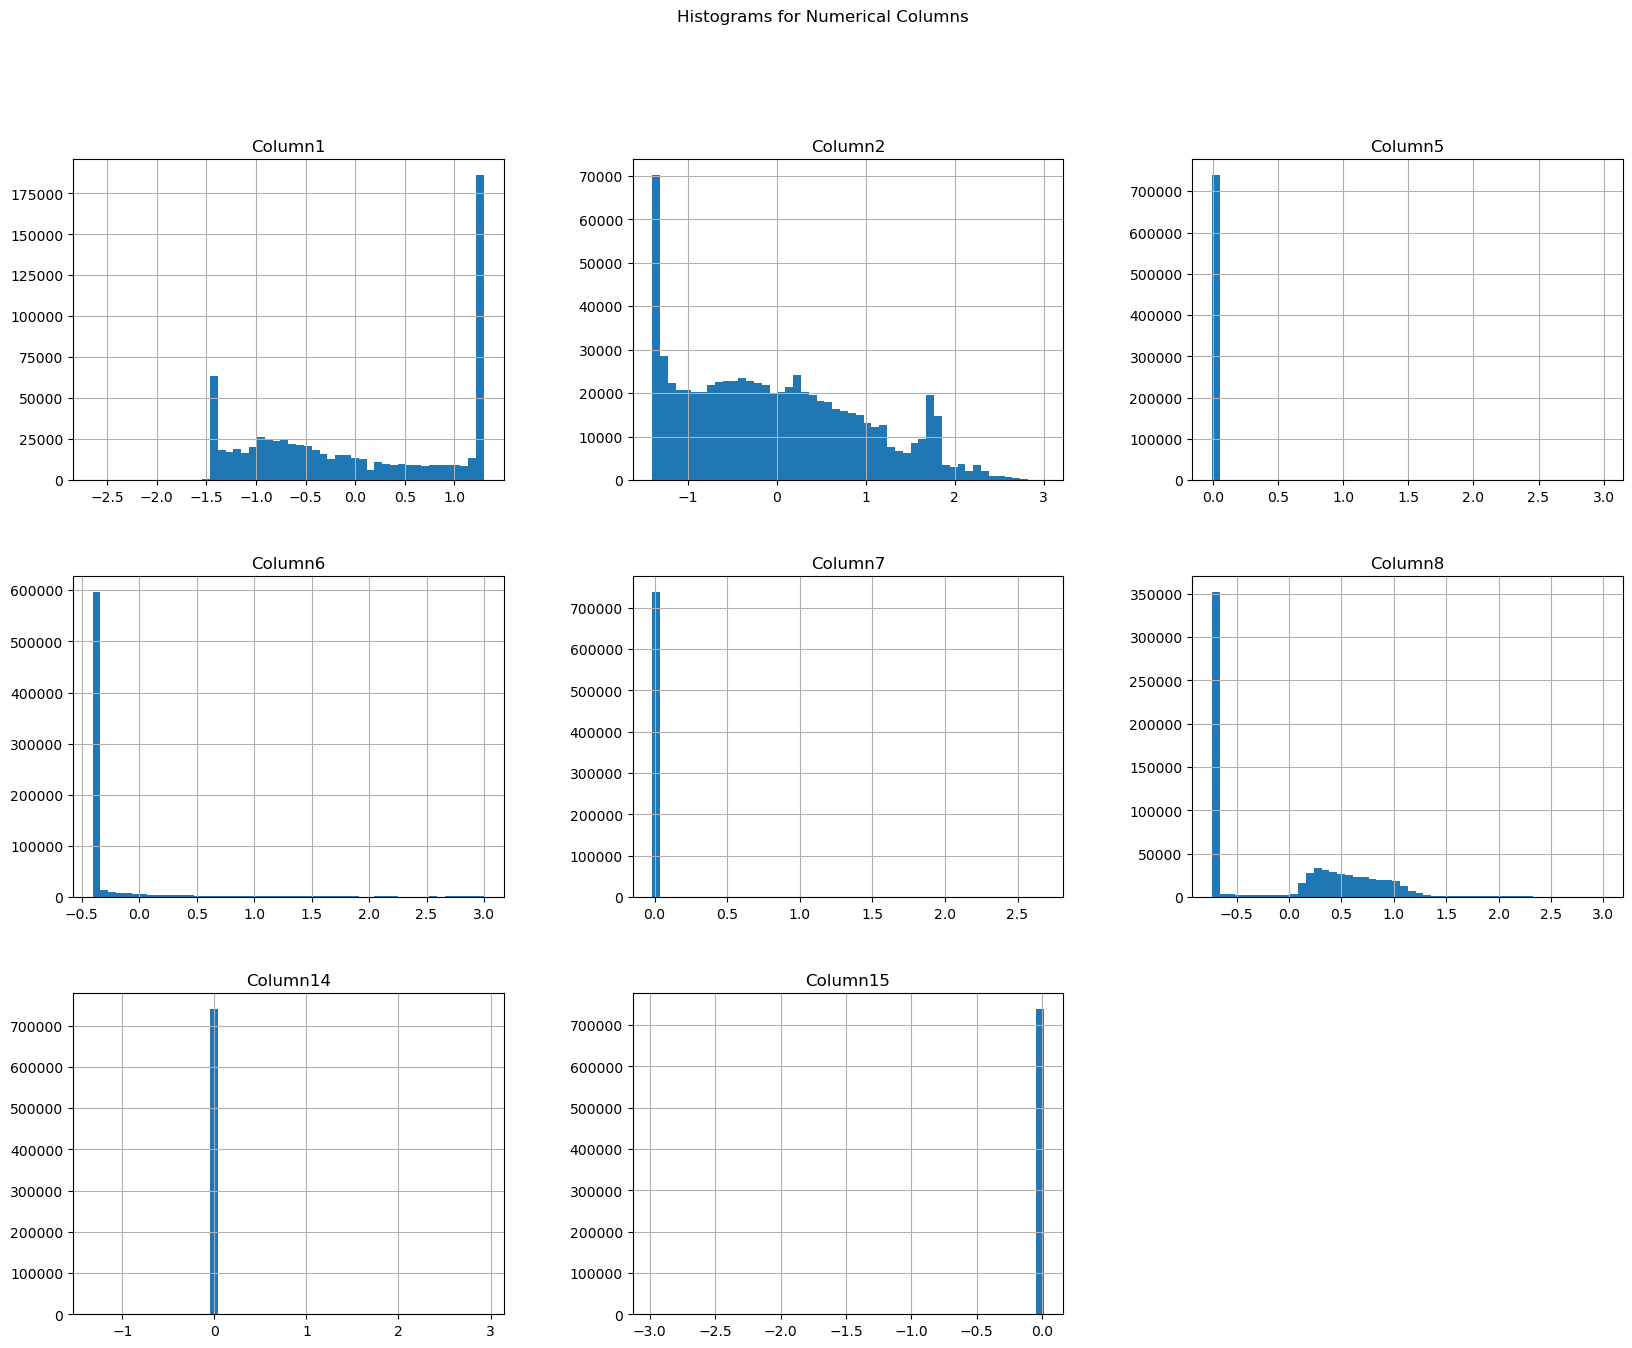

In [38]:
# Plot histograms for numerical columns
X_train_clean[numerical_cols].hist(bins=50, figsize=(20, 15))
plt.suptitle('Histograms for Numerical Columns')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19460\2587674576.py:11: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


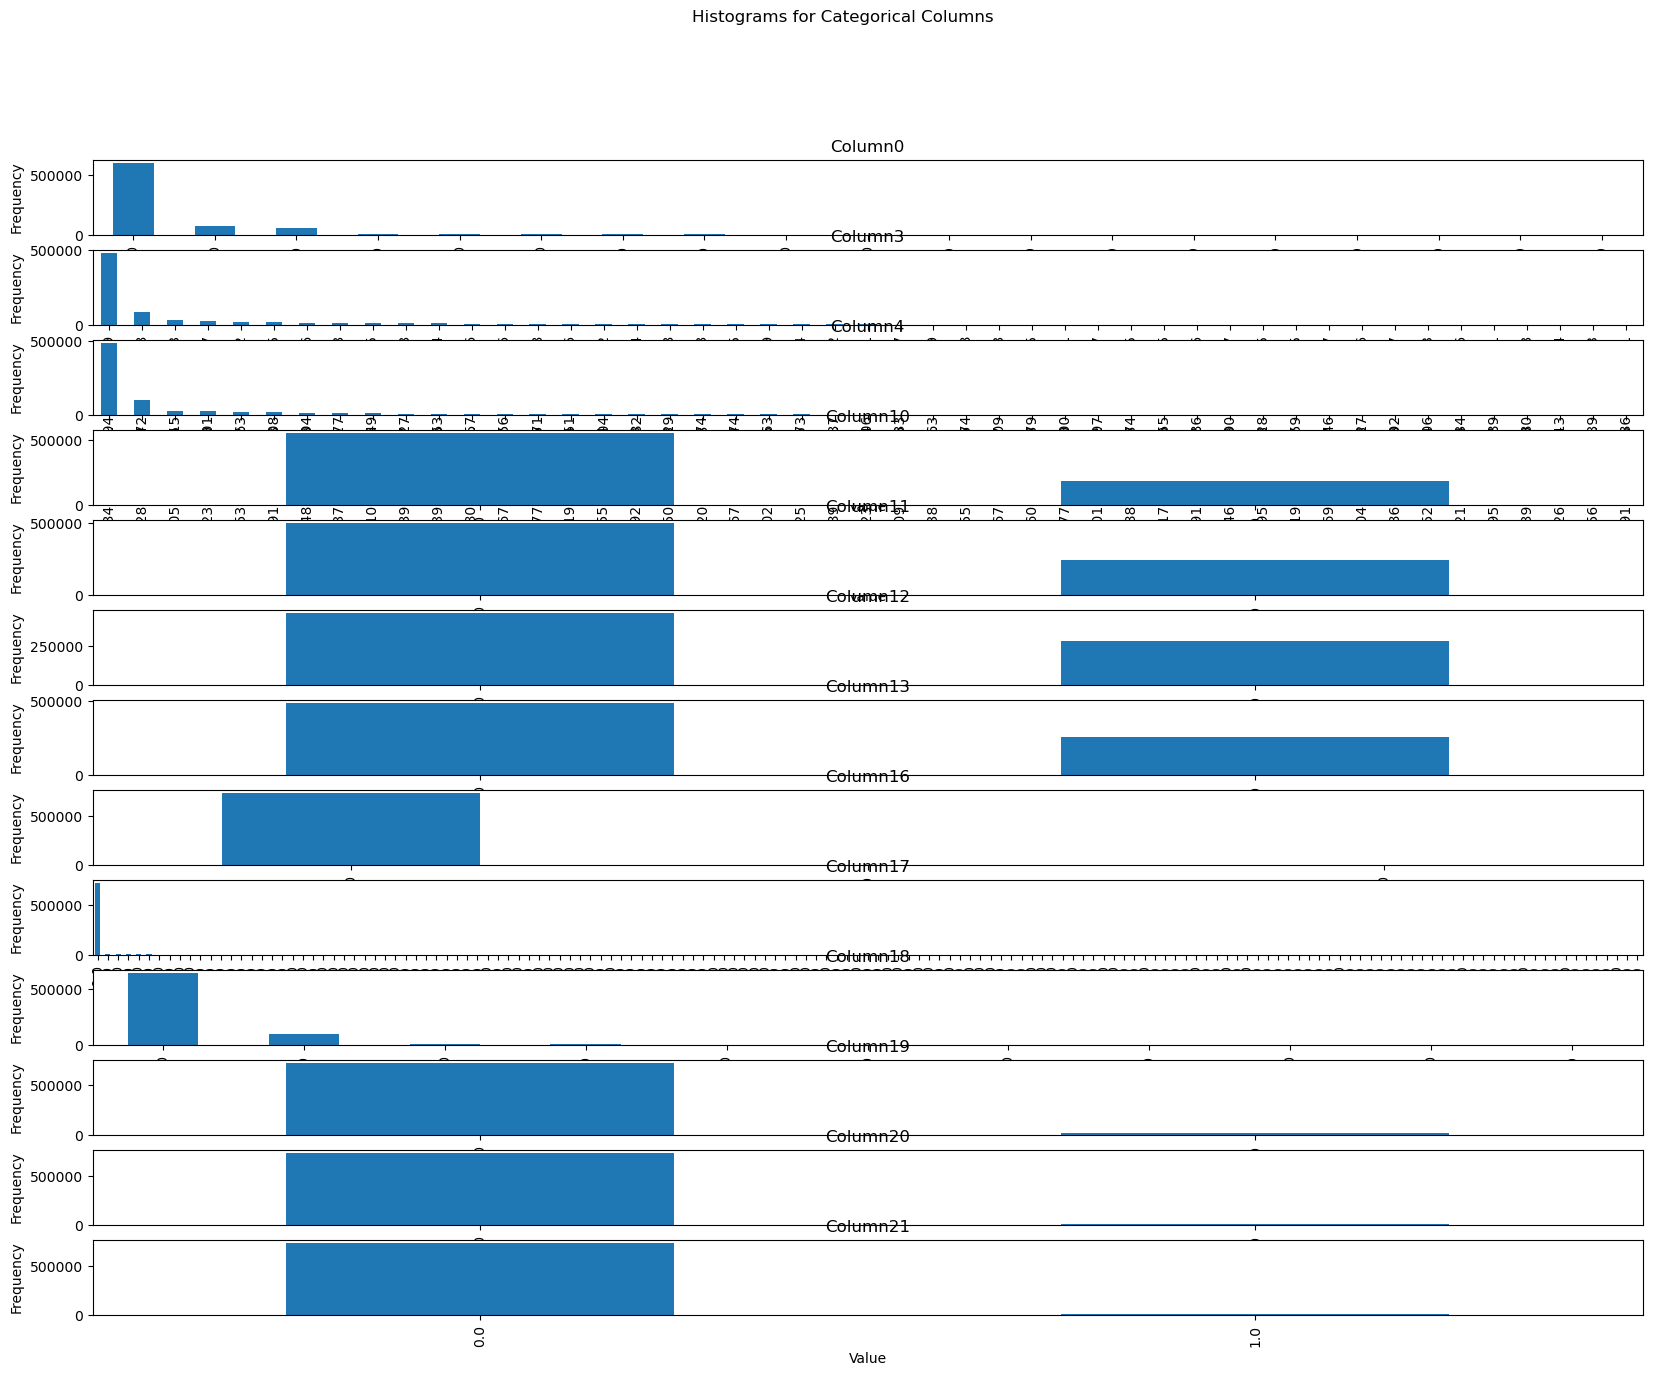

In [39]:

# Plot histograms for categorical columns
fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(20, 15))
fig.suptitle('Histograms for Categorical Columns')

for i, col in enumerate(categorical_cols):
    X_train_clean[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

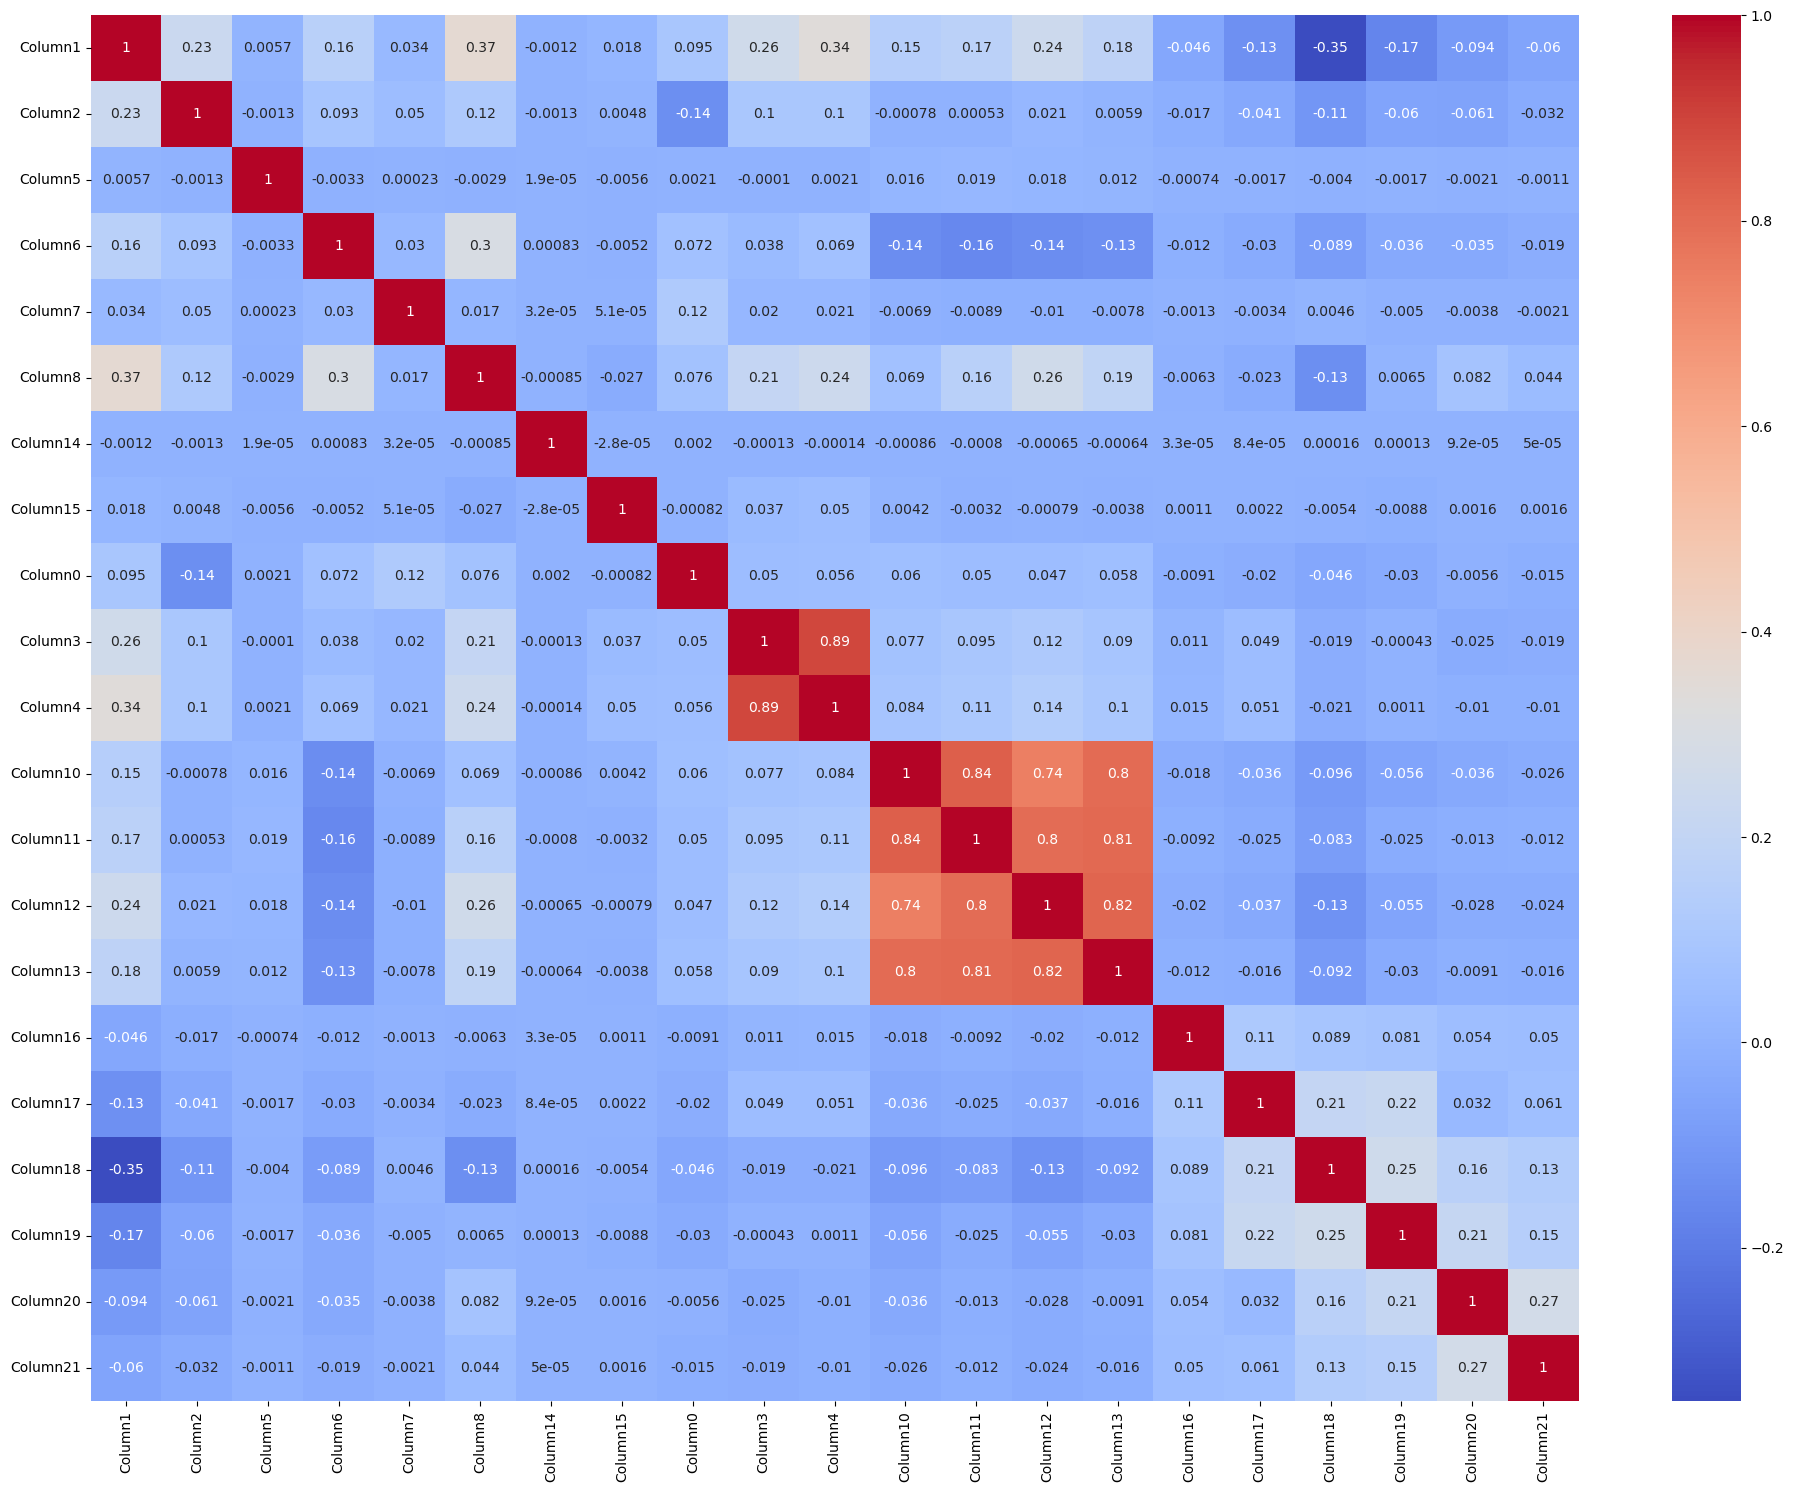

In [40]:
# Correlation Matrix
plt.figure(figsize=(24, 18))
sns.heatmap(X_train_clean.corr(), annot=True, cmap='coolwarm')
plt.show()

In [41]:
#Defining pipeline
feature_interaction_pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_classif, k=6)),
    ('interaction_terms', PolynomialFeatures(interaction_only=True))
])

In [42]:
y_train_clean = y_train_clean.values.ravel()

In [43]:
# Applying feature selection on training data
X_train_selected = feature_interaction_pipeline.fit_transform(X_train_clean[numerical_cols], y_train_clean)

In [44]:
# Getting the names of the selected features
selected_features = X_train_clean[numerical_cols].columns[feature_interaction_pipeline.named_steps['feature_selection'].get_support()]

In [45]:
# Getting interaction feature names
interaction_feature_names = feature_interaction_pipeline.named_steps['interaction_terms'].get_feature_names_out(input_features=selected_features)

In [46]:
# Combinining original and interaction features for training data
X_train_interactions = pd.DataFrame(X_train_selected, columns=interaction_feature_names)
X_train_enhanced = pd.concat([X_train_clean.reset_index(drop=True), X_train_interactions.reset_index(drop=True)], axis=1)


In [47]:
# Ensure no duplicate columns for training data
X_train_enhanced = X_train_enhanced.loc[:, ~X_train_enhanced.columns.duplicated()]

In [48]:
# Applying feature selection on testing data
X_test_selected = feature_interaction_pipeline.transform(X_test_preprocessed_df[numerical_cols])


In [49]:
# Getting interaction terms for testing data
X_test_interactions = pd.DataFrame(X_test_selected, columns=interaction_feature_names)
X_test_enhanced = pd.concat([X_test_preprocessed_df.reset_index(drop=True), X_test_interactions.reset_index(drop=True)], axis=1)

In [50]:
# Ensure no duplicate columns for testing data
X_test_enhanced = X_test_enhanced.loc[:, ~X_test_enhanced.columns.duplicated()]

In [51]:
# Ensure aligned shapes
assert X_train_enhanced.shape[1] == X_test_enhanced.shape[1], "Shape mismatch detected"

In [52]:
print("Enhanced X_train:\n", X_train_enhanced.head())
print("Enhanced X_test:\n", X_test_enhanced.head())

Enhanced X_train:
     Column1   Column2   Column5   Column6   Column7   Column8  Column14  \
0  1.293126  0.361489 -0.006204  0.438239 -0.015613  0.574671  0.001253   
1  1.293126  0.234572 -0.006204  1.562491 -0.015586  0.312562  0.001253   
2  1.293126  0.742705 -0.006205 -0.406478 -0.015618 -0.735547  0.001253   
3 -1.224323 -1.349553 -0.006205 -0.406478 -0.015618 -0.735547  0.001253   
4 -0.665502 -0.933808 -0.006205 -0.406478 -0.015618 -0.735547  0.001253   

   Column15  Column0   Column3  ...  Column2 Column5  Column2 Column6  \
0  0.003259      2.0  0.678139  ...        -0.002243         0.158418   
1  0.003259      0.0  0.452580  ...        -0.001455         0.366517   
2  0.003259      2.0 -1.577453  ...        -0.004609        -0.301894   
3  0.003259      0.0  0.678139  ...         0.008374         0.548564   
4  0.003259      0.0 -2.028572  ...         0.005795         0.379573   

   Column2 Column7  Column2 Column8  Column5 Column6  Column5 Column7  \
0        -0.005644

In [53]:
# Save the feature selection and interaction terms pipeline
joblib.dump(feature_interaction_pipeline, 'feature_interaction_pipeline.pkl')

['feature_interaction_pipeline.pkl']

In [54]:
# Balancing the dataset by generating synthetic samples
smote = SMOTE(sampling_strategy='auto', random_state=42)
xtrain_balanced, ytrain_balanced = smote.fit_resample(X_train_enhanced, y_train_clean)

In [55]:
# Verify there are no duplicate columns
xtrain_balanced = pd.DataFrame(xtrain_balanced, columns=X_train_enhanced.columns)
print("Columns in xtrain_balanced:", xtrain_balanced.columns)
print("Duplicates in xtrain_balanced:", xtrain_balanced.columns.duplicated().sum())

Columns in xtrain_balanced: Index(['Column1', 'Column2', 'Column5', 'Column6', 'Column7', 'Column8',
       'Column14', 'Column15', 'Column0', 'Column3', 'Column4', 'Column10',
       'Column11', 'Column12', 'Column13', 'Column16', 'Column17', 'Column18',
       'Column19', 'Column20', 'Column21', '1', 'Column1 Column2',
       'Column1 Column5', 'Column1 Column6', 'Column1 Column7',
       'Column1 Column8', 'Column2 Column5', 'Column2 Column6',
       'Column2 Column7', 'Column2 Column8', 'Column5 Column6',
       'Column5 Column7', 'Column5 Column8', 'Column6 Column7',
       'Column6 Column8', 'Column7 Column8'],
      dtype='object')
Duplicates in xtrain_balanced: 0


In [56]:
# Visualization
xtrain_balanced = pd.DataFrame(xtrain_balanced, columns=X_train_enhanced.columns)

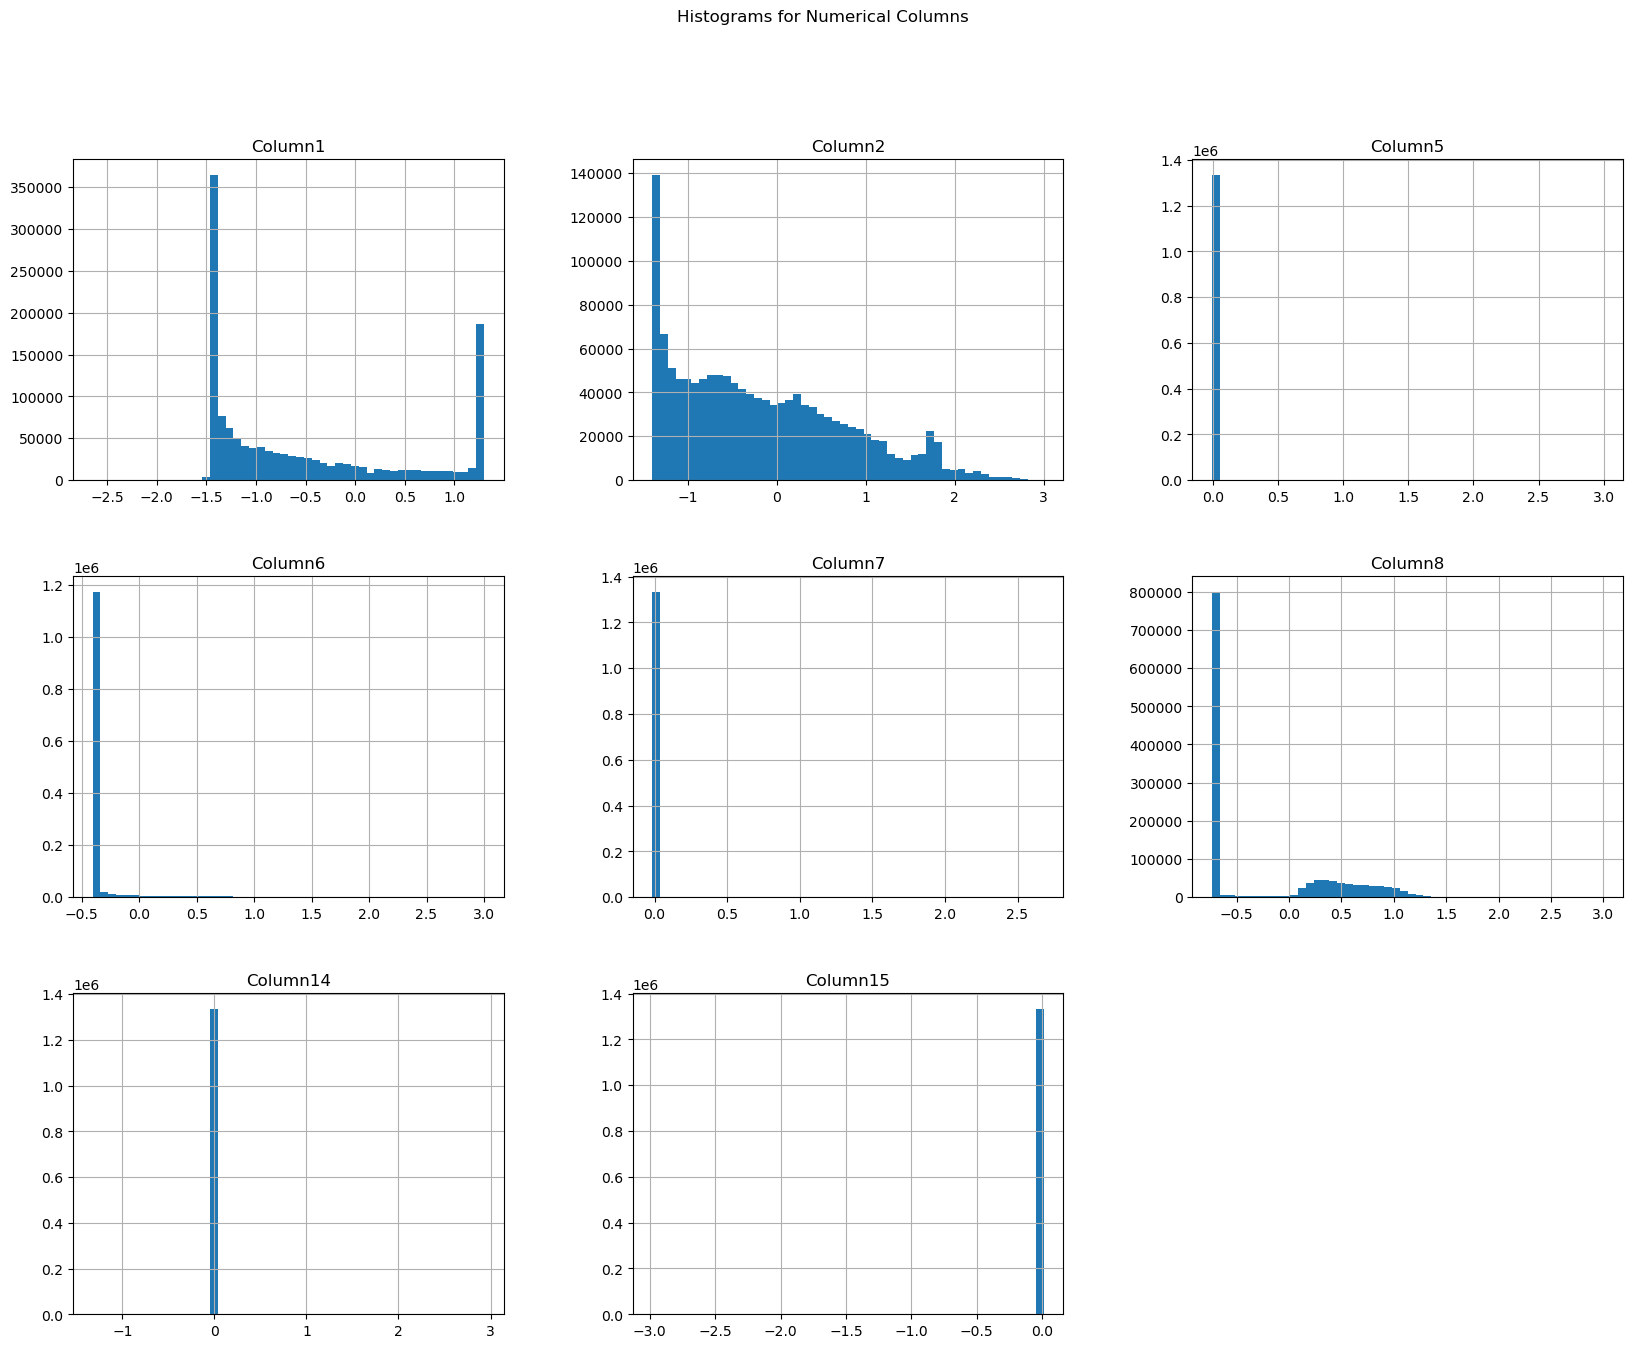

In [57]:
# Plot histograms for numerical columns
xtrain_balanced[numerical_cols].hist(bins=50, figsize=(20, 15))
plt.suptitle('Histograms for Numerical Columns')
plt.show()


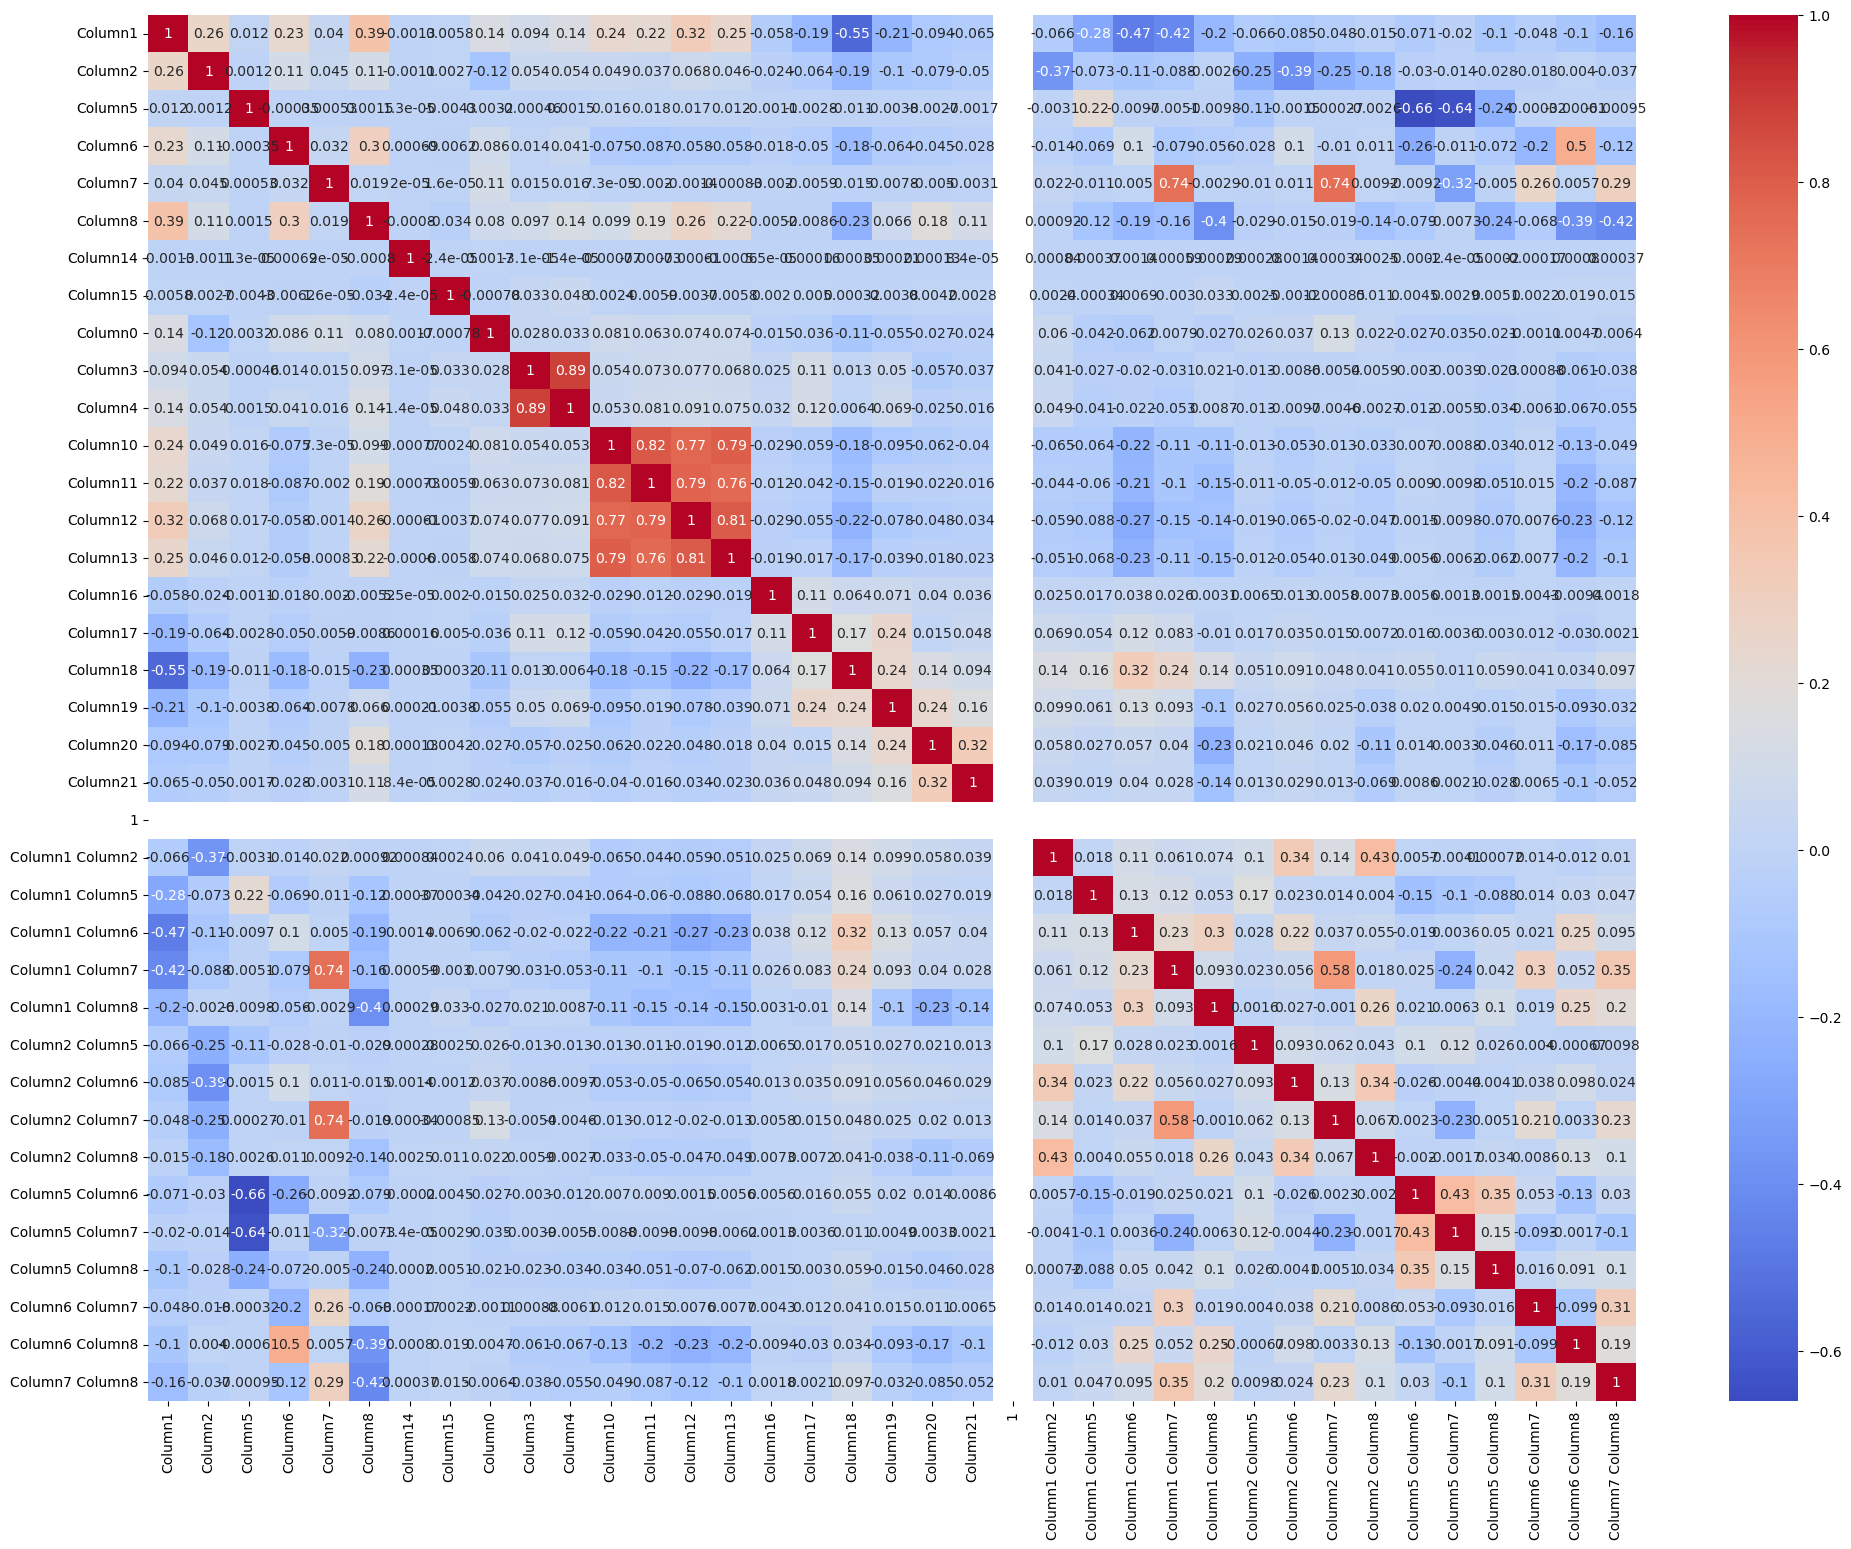

In [58]:
# Correlation Matrix for balanced training dataset
plt.figure(figsize=(24, 18))
sns.heatmap(xtrain_balanced.corr(), annot=True, cmap='coolwarm')
plt.show()

In [59]:
# Create a pipeline for PCA
pca = PCA(n_components=0.98)

In [60]:
# Apply PCA on training data
X_train_pca = pca.fit_transform(xtrain_balanced)
print("PCA Applied Training Data:\n", X_train_pca[:5])

PCA Applied Training Data:
 [[-1.4129176   1.76697612  0.51144668  1.24610567  0.79576183  1.31360425
  -0.89435022 -0.4202559   0.4280732  -0.46824409  0.19652839]
 [-1.39527157  1.30994712  0.18063373  0.26544704 -0.69365662  0.93599669
  -1.14516115 -1.04282536  1.47200369 -0.92749761 -0.84660951]
 [-1.50076132  0.56586571 -1.98475949  2.97817223  0.37966751  0.2774488
   0.49289243  1.14431165 -1.17030314  0.10037208 -1.03577338]
 [-1.27641865 -1.25608024  2.14624254 -0.29879616 -0.38968318  0.14104223
   0.10718616 -0.34290995 -0.09145872  0.14553311  0.06136536]
 [-1.41397633 -2.39864951 -1.40015062  1.26799784 -0.53003437  0.31412089
   0.15004996 -0.72210662 -0.16913777  0.20812305 -0.12097556]]


In [61]:
# Save the PCA model
joblib.dump(pca, 'pca_model.pkl')

['pca_model.pkl']

In [62]:
# Explained variance ratio for training data
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

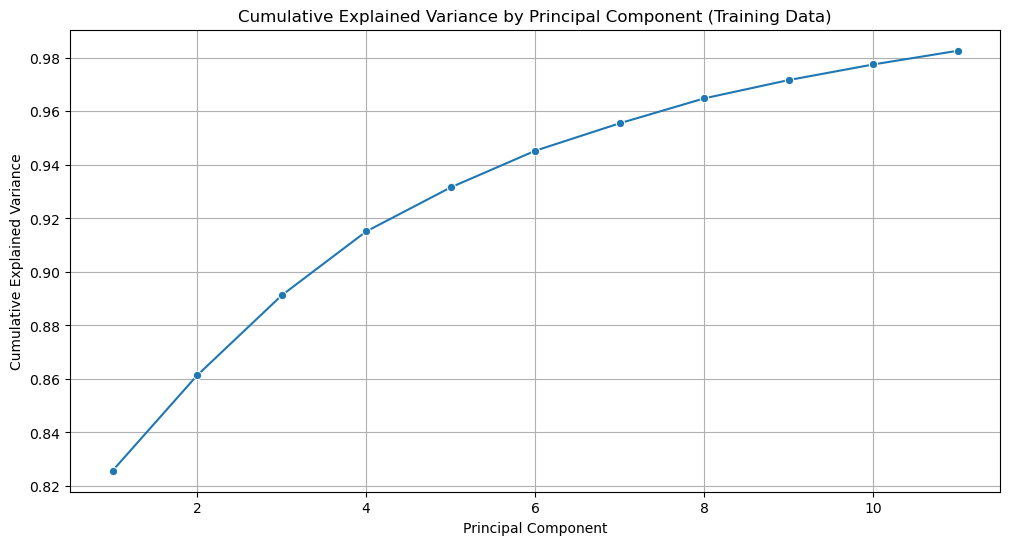

In [63]:
# Plot the cumulative explained variance
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(1, len(cumulative_explained_variance) + 1), y=cumulative_explained_variance, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Component (Training Data)')
plt.grid(True)
plt.show()

In [64]:
# Apply PCA on testing data
X_test_pca = pca.transform(X_test_enhanced)
print("PCA Applied Testing Data:\n", X_test_pca[:5])

PCA Applied Testing Data:
 [[-1.40635313  1.84625739 -0.02484573  0.86189077  0.84227888 -1.37006005
   1.28644201 -0.95556695  0.40222101 -0.53489191  0.30990701]
 [-1.38432557  1.21383573  0.61165648  1.17486131  1.54892998 -0.80371652
   0.4317734  -0.85970498  0.05679456  0.06797371  0.13201368]
 [-1.44482157 -1.43402003 -2.64825126  0.55272319 -0.2456692   0.501033
  -0.18087679 -0.19185742 -0.48129526 -0.10410605 -0.28646867]
 [-1.38218906 -0.10622977 -1.38262109  0.22697361 -0.21875451 -1.05089808
  -0.28030697  0.60168512  0.61730473  0.73481043 -0.37097407]
 [-1.47910093 -0.25434672 -3.8190636   0.30592919  1.00976667  0.42109019
   1.06399063  1.3257429  -0.0460003  -0.58687048 -0.75659898]]


In [65]:
# Print the cumulative explained variance for clarity
print(f"Cumulative explained variance by PCA: {cumulative_explained_variance[-1] * 100:.2f}%")


Cumulative explained variance by PCA: 98.27%


In [66]:
# Convert PCA result back to DataFrame
X_test_pca = pd.DataFrame(X_test_pca)


In [67]:
# Explained variance ratio for the testing data
explained_variance_ratio_test = pca.explained_variance_ratio_
cumulative_explained_variance_test = np.cumsum(explained_variance_ratio_test)

In [68]:
# Convert to DataFrame for easy plotting
pca_variance_test_df = pd.DataFrame({
    'Principal Component': range(1, len(cumulative_explained_variance_test) + 1),
    'Cumulative Explained Variance': cumulative_explained_variance_test
})

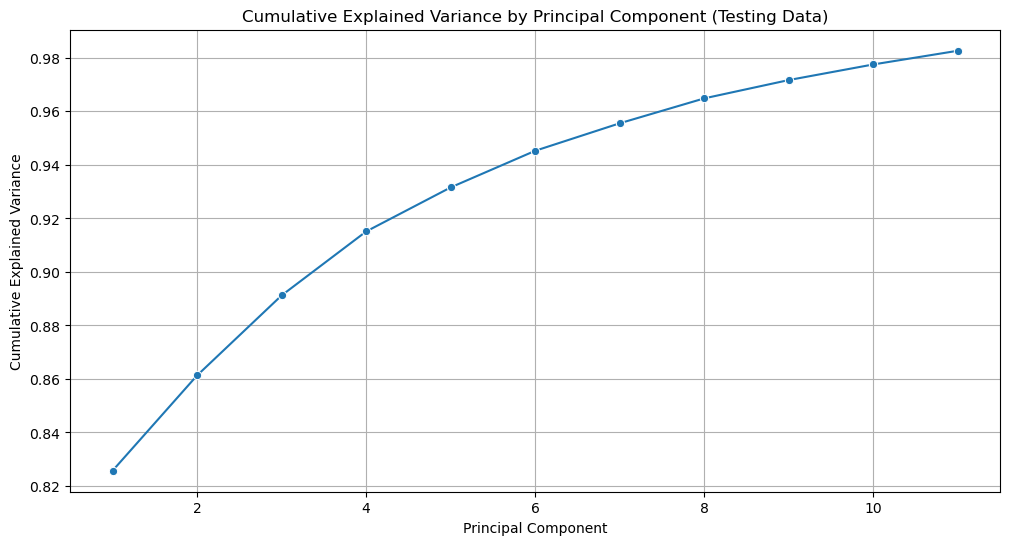

In [69]:
# Plot the cumulative explained variance for testing data
plt.figure(figsize=(12, 6))
sns.lineplot(x='Principal Component', y='Cumulative Explained Variance', data=pca_variance_test_df, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Component (Testing Data)')
plt.grid(True)
plt.show()


In [70]:
# Print the cumulative explained variance for clarity
print(f"Cumulative explained variance by PCA on testing data: {cumulative_explained_variance_test[-1] * 100:.2f}%")

Cumulative explained variance by PCA on testing data: 98.27%


In [71]:
#MODEL TRAINING

In [72]:
subset_percentage = 0.1  # Define the percentage of data to use as subset

In [73]:
X_train_pca.shape

(1336548, 11)

In [74]:
# Split the data into subsets
xtrain_pca_sub, _, y_train_sub, _ = train_test_split(X_train_pca, ytrain_balanced, train_size=subset_percentage, random_state=42, stratify=ytrain_balanced)
#stratify=ytrain_cl: Ensures that the split maintains the same distribution of classes as in the original dataset.

In [75]:
# Define parameter grids
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2],
    
}
#learning_rate: Step size shrinkage used to prevent overfitting
#subsample: Fraction of samples to be used for fitting the individual base learners. (sample of dataset)
#colsample_bytree: Fraction of features to be used for each tree. (randomly selects percentage of features
                 # If set to 0.8, each tree is trained on 80% of the features.
#gamma: Minimum loss reduction required to make a further partition on a leaf node of the tree.
       #Controls the complexity of the tree. Higher values lead to more conservative models. If set to 0, there is no constraint on the partitioning.

In [76]:
xgb = xgb.XGBClassifier(random_state=42, eval_metric='logloss')#Creating instance for XGBoost
# label encoder is a deprecated function becuz xgboost wants that user better give it encoded values.
# logloss: Measures the performance of a classification model where the output is a probability value between 0 and 1.
# Logloss penalizes false classifications more heavily, which helps in training a model that outputs well-calibrated probabilities.

In [77]:
# RandomizedSearchCV for XGBoost

xgb_random_search = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_param_grid,
                                       n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
#cv=3: Number of cross-validation folds.
#verbose=2: Controls the verbosity of the output.


In [78]:
xgb_random_search.fit(xtrain_pca_sub, y_train_sub)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 6, 9],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.7, 0.8, 0.9]},
                   random_state=42, verbose=2)

In [79]:
best_xgb_params = xgb_random_search.best_params_

In [80]:
print("XGBoost Parameters:", best_xgb_params)

XGBoost Parameters: {'subsample': 0.7, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 0.7}


In [81]:
sgd_param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l2', 'elasticnet'],
    'max_iter': [1000, 2000, 3000]
}
#alpha: Regularization strength.
#penalty: Specifies the norm used in the penalization (‘l2’ for Ridge, ‘elasticnet’ for a combination of L1 and L2).

In [82]:
sgd = SGDClassifier(random_state=42)#Creating instance for SGDClassifier

In [83]:
# Grid search for SGDClassifier
sgd_grid_search = GridSearchCV(estimator=sgd, param_grid=sgd_param_grid,
                               cv=3, verbose=2, n_jobs=-1)

In [84]:
y_train_sub.shape

(133654,)

In [85]:
sgd_grid_search.fit(xtrain_pca_sub, y_train_sub)#Fitting Grid search

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=SGDClassifier(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'max_iter': [1000, 2000, 3000],
                         'penalty': ['l2', 'elasticnet']},
             verbose=2)

In [86]:
best_sgd_params = sgd_grid_search.best_params_

In [87]:
print("Best SGDClassifier Parameters:", best_sgd_params)

Best SGDClassifier Parameters: {'alpha': 0.0001, 'max_iter': 1000, 'penalty': 'elasticnet'}


In [88]:
# Initializing base models with best parameters
xgb_best = XGBClassifier(**best_xgb_params, random_state=42, eval_metric='logloss')
sgd_best = SGDClassifier(**best_sgd_params, random_state=42)

In [89]:
estimators = [
    ('xgb', xgb_best), 
    ('sgd', sgd_best)   
]

In [90]:
# Defining final estimator
final_estimator = LogisticRegression(penalty='l2', solver='saga')

In [91]:
# Creating the StackingClassifier
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
n_jobs=-1

In [92]:
X_train_pca.shape

(1336548, 11)

In [93]:
# Fit the stacking classifier
stacking_clf.fit(X_train_pca, ytrain_balanced)

StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.7, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=0.2,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learni...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=6,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=300, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...)),
                               ('sgd',
                                SGDClassifier(penalty='elasticnet',
                                              random_state=42))],
                   final_estimator=LogisticRegression(solver='saga'))

In [94]:
joblib.dump(stacking_clf, 'trained_stacking_clf.pkl') #Saving the Model pipeline

['trained_stacking_clf.pkl']

In [95]:
# Evaluating the model
y_pred = stacking_clf.predict(X_test_pca)
accuracy = accuracy_score(ytest, y_pred)
print(f"Stacked Model Test Accuracy: {accuracy:.2f}")

Stacked Model Test Accuracy: 0.97


In [96]:
# Defining k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [97]:
# Defining StratifiedKFold
strat_k_fold = StratifiedKFold(n_splits=5)

In [98]:
# Performing cross-validation
scores = cross_val_score(stacking_clf, X_train_pca, ytrain_balanced, cv=strat_k_fold, scoring='accuracy')

In [99]:
print(f'Cross-validation scores: {scores}')
print(f'Mean accuracy: {scores.mean():.2f}')

Cross-validation scores: [0.981138   0.98174778 0.98175901 0.98172527 0.98176268]
Mean accuracy: 0.98


In [100]:
# Predicting on the test data
y_pred = stacking_clf.predict(X_test_pca)
y_proba = stacking_clf.predict_proba(X_test_pca)[:, 1]  # Probabilities for ROC AUC

In [101]:
# Classification Report
print("Classification Report:")
print(classification_report(ytest, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    237034
           1       0.77      0.97      0.86     24678

    accuracy                           0.97    261712
   macro avg       0.89      0.97      0.92    261712
weighted avg       0.98      0.97      0.97    261712



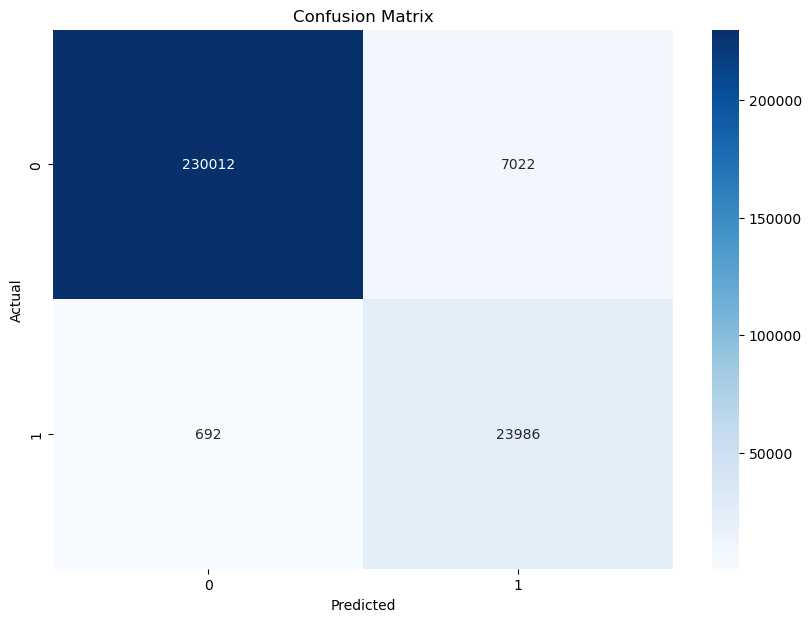

In [102]:
# Confusion Matrix
conf_matrix = confusion_matrix(ytest, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

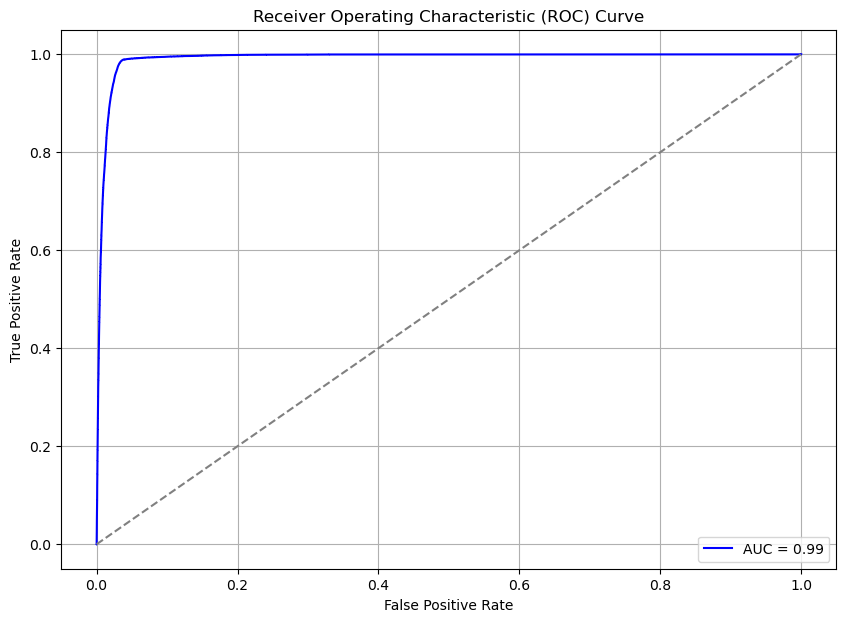

In [103]:
# AUC-ROC Curve
fpr, tpr, _ = roc_curve(ytest, y_proba)
roc_auc = roc_auc_score(ytest, y_proba)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

In [104]:
# Creating instance for training individually
xgb_best = xgb_random_search.best_estimator_
sgd_best = sgd_grid_search.best_estimator_


In [105]:
sgd_best.fit(X_train_pca, ytrain_balanced)

SGDClassifier(penalty='elasticnet', random_state=42)

In [106]:
xgb_best.fit(X_train_pca, ytrain_balanced)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [107]:
# SHAP for SGDClassifier using LinearExplainer
explainer_sgd = shap.LinearExplainer(sgd_best, X_train_pca)
shap_values_sgd = explainer_sgd.shap_values(X_test_pca)


In [108]:
# SHAP for XGBoost using TreeExplainer
explainer_xgb = shap.TreeExplainer(xgb_best)
shap_values_xgb = explainer_xgb.shap_values(X_test_pca,  check_additivity=False)

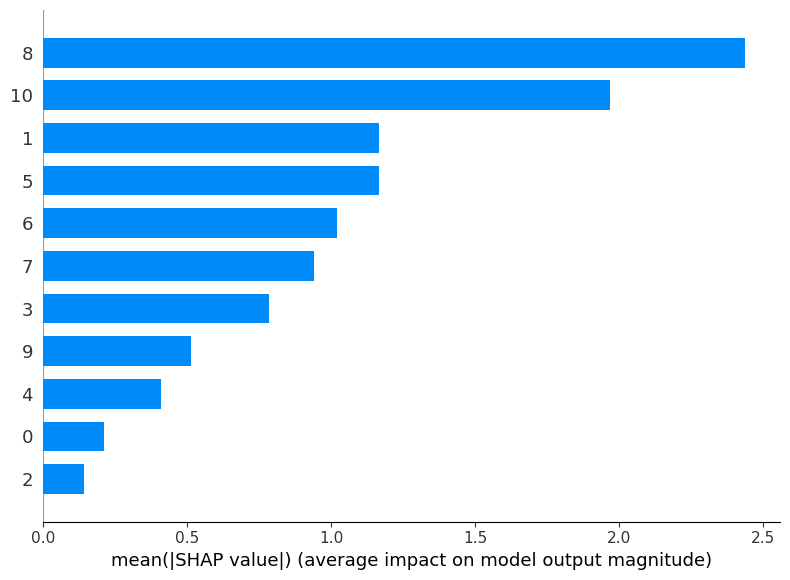

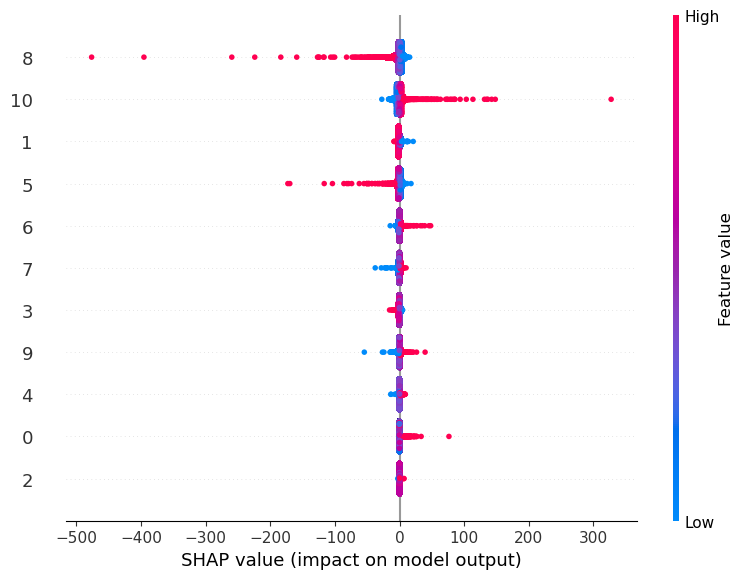

In [109]:
# Visualizing SHAP values for the SGDClassifier model
shap.summary_plot(shap_values_sgd, X_test_pca, plot_type="bar")
shap.summary_plot(shap_values_sgd, X_test_pca)

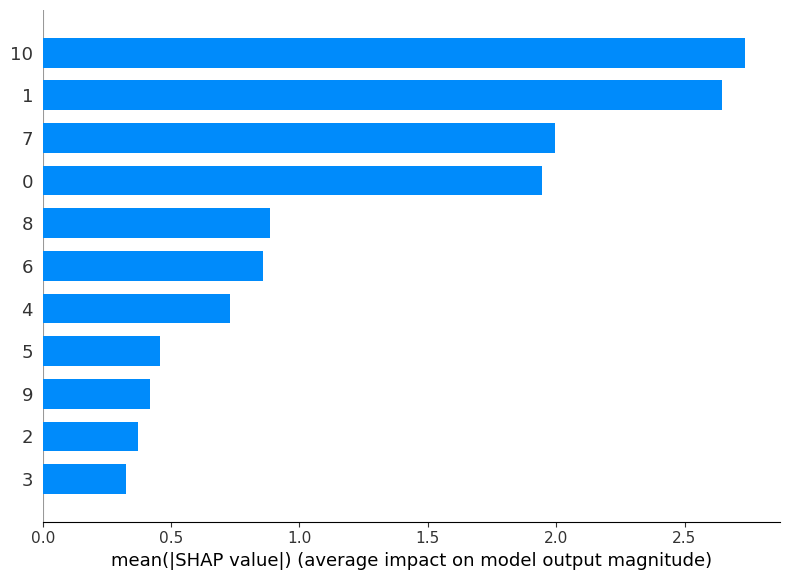

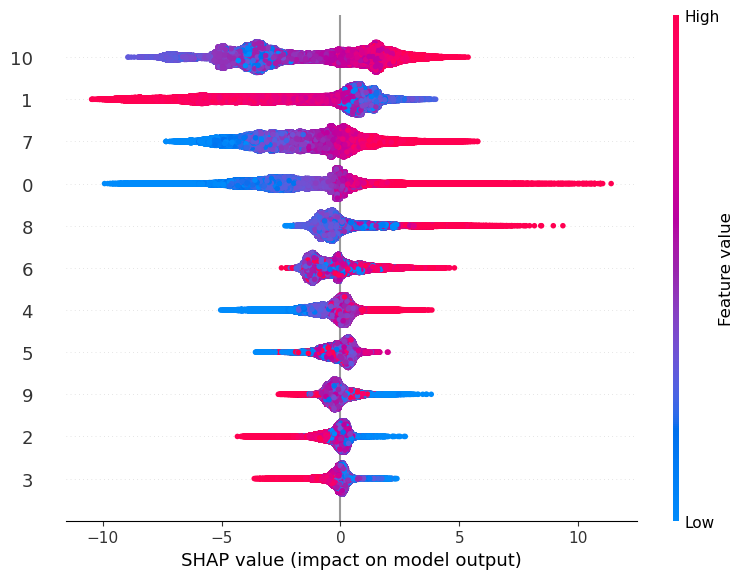

In [110]:
# Visualize SHAP values for the XGBoost model
shap.summary_plot(shap_values_xgb, X_test_pca, plot_type="bar")
shap.summary_plot(shap_values_xgb, X_test_pca)

In [111]:
# Extracting PCA components
pca_components = pd.DataFrame(pca.components_, columns=X_test_enhanced.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])

In [112]:
# Inversing transform to original feature space
xtest = pd.DataFrame(pca.inverse_transform(X_test_pca), columns=X_test_enhanced.columns)

In [113]:
# Verifying shapes and columns
print("Original feature names:", xtest.columns)
print("Shape of X_test_original:", xtest.shape)

Original feature names: Index(['Column1', 'Column2', 'Column5', 'Column6', 'Column7', 'Column8',
       'Column14', 'Column15', 'Column0', 'Column3', 'Column4', 'Column10',
       'Column11', 'Column12', 'Column13', 'Column16', 'Column17', 'Column18',
       'Column19', 'Column20', 'Column21', '1', 'Column1 Column2',
       'Column1 Column5', 'Column1 Column6', 'Column1 Column7',
       'Column1 Column8', 'Column2 Column5', 'Column2 Column6',
       'Column2 Column7', 'Column2 Column8', 'Column5 Column6',
       'Column5 Column7', 'Column5 Column8', 'Column6 Column7',
       'Column6 Column8', 'Column7 Column8'],
      dtype='object')
Shape of X_test_original: (261712, 37)


In [114]:
# SHAP for XGBoost using LinearExplainer but original values
explainer_xgb = shap.TreeExplainer(xgb_best)
shap_values_xgb = explainer_xgb.shap_values(X_test_pca, check_additivity=False)

In [115]:
# SHAP for SGDClassifier using LinearExplainer
explainer_sgd = shap.LinearExplainer(sgd_best, X_train_pca)
shap_values_sgd = explainer_sgd.shap_values(X_test_pca)

In [116]:
# Map SHAP values back to original features
shap_values_mapped_xgb = shap_values_xgb @ pca.components_
shap_values_mapped_sgd = shap_values_sgd @ pca.components_

In [117]:
# Creating dataframes for better readability
shap_values_mapped_xgb_df = pd.DataFrame(shap_values_mapped_xgb, columns=X_test_enhanced.columns)
shap_values_mapped_sgd_df = pd.DataFrame(shap_values_mapped_sgd, columns=X_test_enhanced.columns)


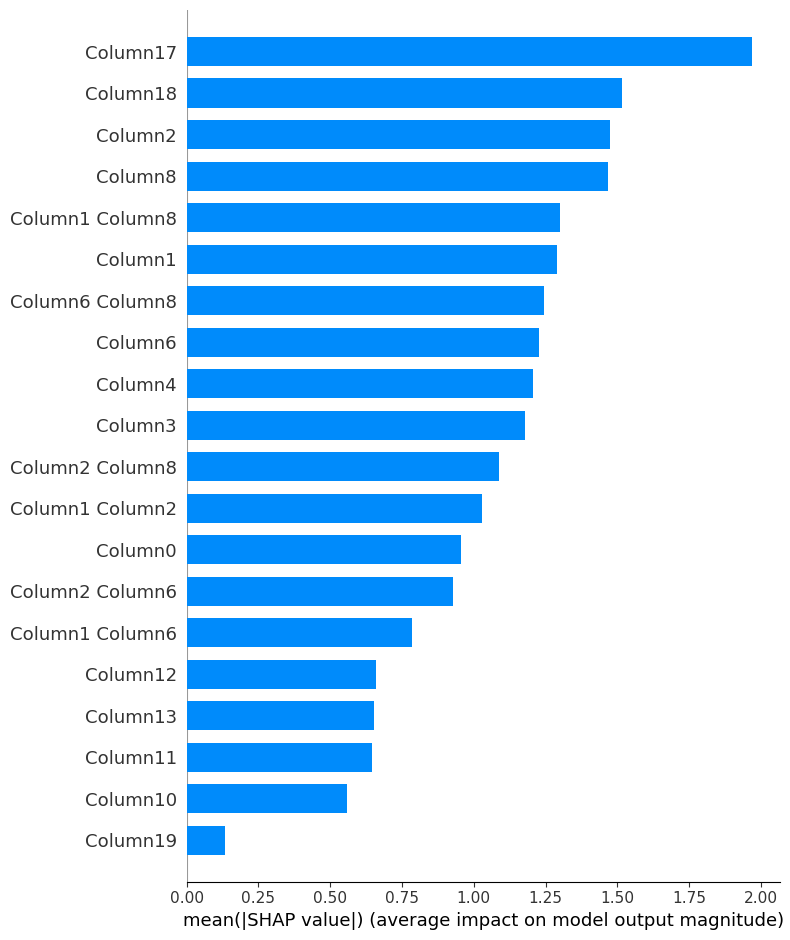

In [118]:
# Visualize SHAP values for XGBoost
shap.summary_plot(shap_values_mapped_xgb_df.values, xtest, plot_type="bar")


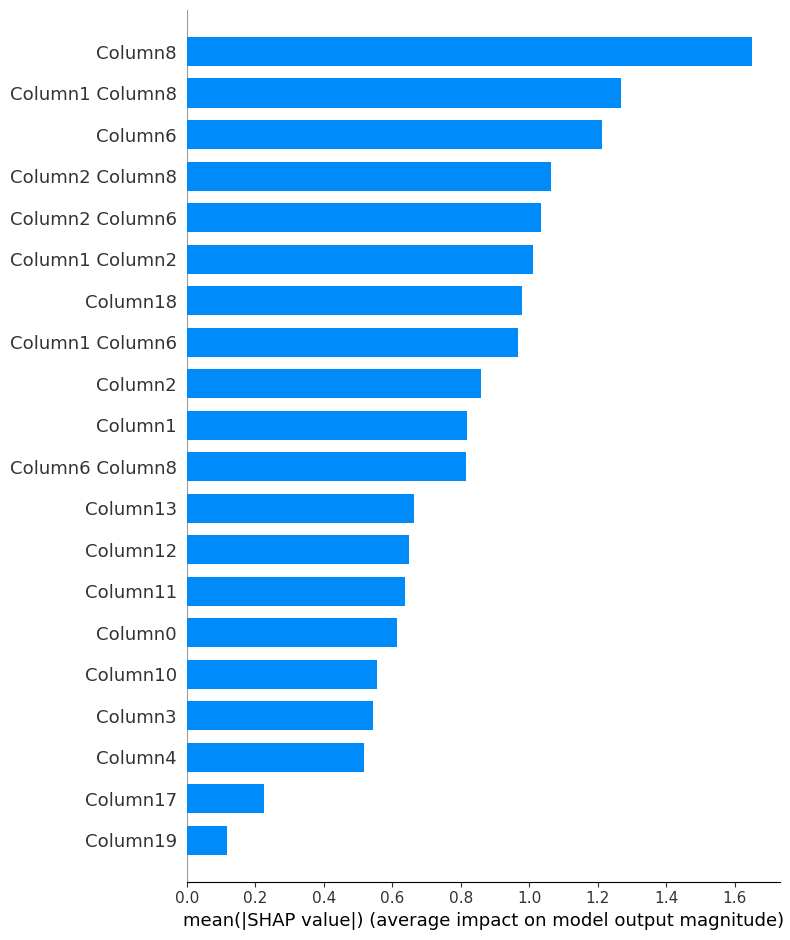

In [119]:
# Visualize SHAP values for SGDClassifier
shap.summary_plot(shap_values_mapped_sgd_df.values, xtest, plot_type="bar")


In [120]:

# Load the pretrained pipelines and models
#preprocessor = joblib.load('preprocessing_pipeline.pkl')
#feature_interaction_pipeline = joblib.load('feature_interaction_pipeline.pkl')
#pca = joblib.load('pca_model.pkl')
#stacking_clf = joblib.load('trained_stacking_clf.pkl')


In [121]:

# Validation data
#X_valid = np.random.rand(200, 21)  # Replace with actual validation data


In [122]:
# Assigning numerical columns
#numerical_cols = ['Column1', 'Column2', 'Column5', 'Column6', 'Column7', 'Column8', 'Column14', 'Column15']

# Assigning categorical columns
#categorical_cols = ['Column0', 'Column3', 'Column4', 'Column10', 'Column11', 'Column12', 'Column13', 'Column16', 'Column17', 'Column18', 'Column19', 'Column20', 'Column21']


In [123]:
# Apply preprocessing to validation data
#X_valid_preprocessed = preprocessor.transform(pd.DataFrame(X_valid, columns=numerical_cols + categorical_cols))
#X_valid_preprocessed_df = pd.DataFrame(X_valid_preprocessed, columns=numerical_cols + categorical_cols)


In [124]:
# Apply feature selection on validation data
#X_valid_selected = feature_interaction_pipeline.transform(X_valid_preprocessed_df[numerical_cols])


In [125]:

# Ensure input features match the selected features
#interaction_feature_names_valid = feature_interaction_pipeline.named_steps['interaction_terms'].get_feature_names_out(input_features=selected_features)


In [126]:

# Create interaction terms for validation data
#X_valid_interactions = pd.DataFrame(X_valid_selected, columns=interaction_feature_names_valid)


In [127]:

# Combine original and interaction features for validation data
#X_valid_enhanced = pd.concat([X_valid_preprocessed_df.reset_index(drop=True), X_valid_interactions.reset_index(drop=True)], axis=1)


In [128]:

# Ensure no duplicate columns for validation data
#X_valid_enhanced = X_valid_enhanced.loc[:, ~X_valid_enhanced.columns.duplicated()]


In [129]:

#print("Enhanced X_valid:\n", X_valid_enhanced.head())


In [130]:
# Apply PCA
#X_valid_pca = pca.transform(X_valid_enhanced)
#print("PCA Applied Validation Data:\n", X_valid_pca[:5])


In [131]:
# Make predictions
#y_pred_valid = stacking_clf.predict(X_valid_pca)
#print("Predictions on validation data:", y_pred_valid)


In [132]:
# Evaluate predictions
#y_valid = ...  # Replace with actual labels


In [133]:

#accuracy = accuracy_score(y_valid, y_pred_valid)
#precision = precision_score(y_valid, y_pred_valid)
#recall = recall_score(y_valid, y_pred_valid)
#f1 = f1_score(y_valid, y_pred_valid)
#roc_auc = roc_auc_score(y_valid, y_pred_valid)
#conf_matrix = confusion_matrix(y_valid, y_pred_valid)
